<a href="https://colab.research.google.com/github/evolver16/42pro/blob/main/Advanced00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
from google.colab import files
uploaded = files.upload()

Saving 0_and_1.csv to 0_and_1 (1).csv


In [136]:
# import required libraries
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
np.random.seed(42)

In [137]:
# Read the data from the CSV file using NumPy
data =np.genfromtxt("0_and_1.csv", delimiter=',', skip_header=1)

# Extract the target variable Y and reshape it
Y=data[:,0]
Y=np.reshape(Y,(1,Y.shape[0]))

# Remove the label column from X and transpose the matrix
X =data[:,1:].T

In [138]:
# Print the shape of Y and X
print("X", X.shape)
print("Y", Y.shape)

X (784, 8816)
Y (1, 8816)


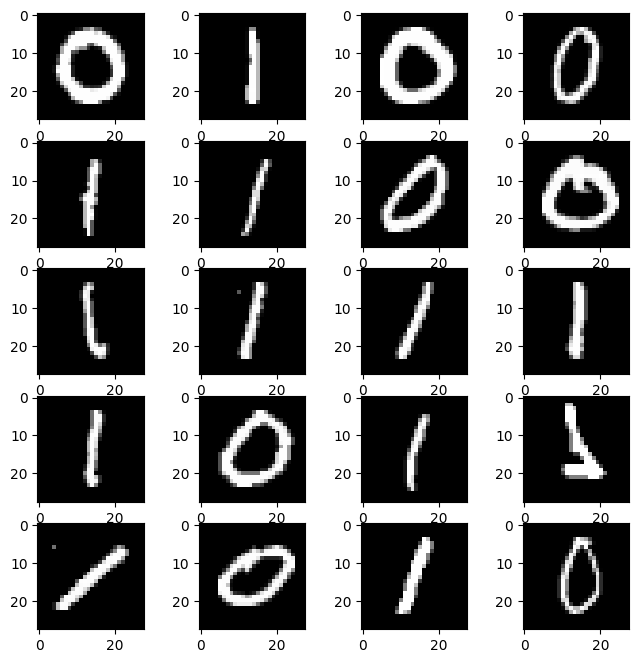

In [139]:
# Create a figure to plot the images
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5

# Loop through and display each image
for i in range(1, columns * rows + 1):
    X1 = X[:,i] # Extract the i-th column (i-th image)
    X1 = np.reshape(X1,(28,28))  # Reshape the flattened image to (28, 28)
    fig.add_subplot(rows, columns, i)  # Add a subplot to the figure
    plt.imshow(X1, cmap='gray')  # Display the image using a grayscale colormap

# Show the plot
plt.show()

In [140]:
import numpy as np

def sigmoid(x, derivative=False):
    """
    Compute the sigmoid function or its derivative.

    :param x: Input value or array.
    :param derivative: If True, compute the derivative of the sigmoid function.
    :return: Sigmoid function or its derivative.
    """
    if derivative:
      return (1+np.exp(-x))**(-2)*(np.exp(-x))
    return 1/(1+np.exp(-x))

In [141]:
print(sigmoid(0))                   # Output: 0.5
print(sigmoid(0, derivative=True))  # Output: 0.25

0.5
0.25


In [142]:
def network_architecture(X, Y):
    # Number of nodes in the input layer
    n_x = 784
    # Number of nodes in the hidden layer
    n_h = 10
    # Number of nodes in the output layer
    n_y = 1
    return (n_x, n_h, n_y)

# Get the network architecture dimensions
n_x, n_h, n_y = network_architecture(X, Y)

# Print the number of nodes in each layer
print("Number of nodes in input layer (n_x):", n_x)
print("Number of nodes in hidden layer (n_h):", n_h)
print("Number of nodes in output layer (n_y):", n_y)

Number of nodes in input layer (n_x): 784
Number of nodes in hidden layer (n_h): 10
Number of nodes in output layer (n_y): 1


In [143]:
def define_network_parameters(n_x, n_h, n_y):
    # Initialize weights and biases for the first layer
    W1 = np.random.randn(n_h, n_x) * 0.01  # Random initialization with small values
    b1 = np.zeros((n_h,1))  # Initialize biases with zeros

    # Initialize weights and biases for the second layer
    W2 = np.random.randn(n_y, n_h) * 0.01  # Random initialization with small values
    b2 = np.zeros((n_y,1))  # Initialize biases with zeros

    # Store the parameters in a dictionary
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    return parameters

In [144]:
# Get the neural network architecture dimensions
n_x, n_h, n_y = network_architecture(X, Y)

# Define the network parameters using the obtained dimensions
params = define_network_parameters(n_x, n_h, n_y)

In [145]:
# Recall that Z = W*X + b & A = g(Z)

# Define the forward propagation function
def forward_propagation(X, params):
    # Calculate the weighted sum and apply activation function for the first layer
    Z1 = np.dot(params["W1"],X)+params["b1"]
    A1 = sigmoid(Z1)

    # Calculate the weighted sum and apply activation function for the second layer
    Z2 =  np.dot(params["W2"],A1)#+params["b2"]
    A2 = sigmoid(Z2)

    # Return the calculated intermediate results
    return {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}

In [146]:
# Perform forward propagation
refor = forward_propagation(X, params)

# Print the shapes of the intermediate variables
print("Z1", refor['Z1'].shape)
print("A1", refor['A1'].shape)
print("Z2", refor['Z2'].shape)
print("A2", refor['A2'].shape)

Z1 (10, 8816)
A1 (10, 8816)
Z2 (1, 8816)
A2 (1, 8816)


In [147]:
def backward_propagation(params, activations, X, Y):
    """
    Compute the derivatives of the loss with respect to the parameters using backpropagation.

    :param params: Dictionary containing the current parameters.
    :param activations: Dictionary containing the intermediate activations during forward propagation.
    :param X: Input data.
    :param Y: True labels.
    :return: Dictionary containing the derivatives of the loss with respect to the parameters.
    """
    m = X.shape[1]  # Number of training examples
    b1, b2, W1, W2 = params['b1'], params['b2'], params['W1'], params['W2']
    Z1, Z2, A1, A2 = activations['Z1'], activations['Z2'], activations['A1'], activations['A2']

    # Output layer
    dZ2 = (A2 - Y) * sigmoid(Z2, derivative=True) / m
    dW2 = np.dot(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)

    # Hidden layer
    dA1 = np.dot(W2.T, dZ2)  # shape: (10, m)
    dZ1 = dA1 * sigmoid(Z1, derivative=True)
    dW1 = np.dot(dZ1, X.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True)

    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}


def update_parameters(params, derivatives, alpha=0.1):
    """
    Update the parameters using gradient descent.

    :param params: Dictionary containing the current parameters.
    :param derivatives: Dictionary containing the derivatives of the loss with respect to the parameters.
    :param alpha: Learning rate.
    :return: Updated parameters.
    """
    params['W1'] = params['W1']-alpha*derivatives['dW1']
    params['b1'] = params['b1']-alpha*derivatives['db1']
    params['W2'] = params['W2']-alpha*derivatives['dW2']
    params['b2'] = params['b2']-alpha*derivatives['db2']
    return params

In [148]:
# Update the parameters using gradient descent and print the updated parameters

# Calculate the derivatives using backward propagation
derivatives = backward_propagation(params, refor, X, Y)

# Update the parameters using the derivatives and learning rate
params = update_parameters(params, derivatives)

# Print the updated parameters
print(params)

{'W1': array([[ 0.00496714, -0.00138264,  0.00647689, ..., -0.01335344,
         0.00380198,  0.00610586],
       [ 0.0055979 ,  0.01080781,  0.00833922, ..., -0.00281328,
         0.00066991,  0.00515939],
       [-0.01562546, -0.00529053,  0.00794265, ..., -0.00392013,
         0.01059936,  0.00617006],
       ...,
       [-0.00711462, -0.00384457, -0.00411025, ...,  0.00493977,
        -0.00362348,  0.00741822],
       [-0.00091968, -0.01081914, -0.00403288, ...,  0.00324658,
         0.00142991, -0.01726011],
       [-0.00270367, -0.00027384,  0.01953107, ..., -0.00077821,
        -0.00275951, -0.00361724]]), 'b1': array([[ 4.43034860e-08],
       [-3.27016527e-07],
       [ 1.08047235e-07],
       [ 9.03683585e-08],
       [-3.29158238e-07],
       [ 2.02600683e-06],
       [ 4.55149759e-07],
       [ 1.29735903e-07],
       [-6.49010563e-08],
       [-3.34558681e-07]]), 'W2': array([[ 0.00504884, -0.00432209,  0.00641367, -0.0030236 ,  0.01701768,
         0.01792251, -0.01160845

In [149]:
def compute_error(Predicted, Actual):
    """
    Compute the mean squared error between predicted values and actual values.

    :param Predicted: Predicted values.
    :param Actual: Actual values.
    :return: Mean squared error.
    """

    return np.mean(1/2*(Predicted-Actual)**2)

In [150]:
def neural_network(X, Y, num_iterations=10):
    """
    Train a neural network model using gradient descent.

    :param X: Input data.
    :param Y: Target data.
    :param num_iterations: Number of iterations for training.
    :return: Trained parameters and cost history.
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]
    cost = []
    params = define_network_parameters(n_x,10,n_y)
    for i in range(num_iterations):
      activations = forward_propagation(X,params)
      cost.append(compute_error(activations['A2'],Y))
      derivatives = backward_propagation(params,activations,X,Y)
      params = update_parameters(params,derivatives)
    return params,cost




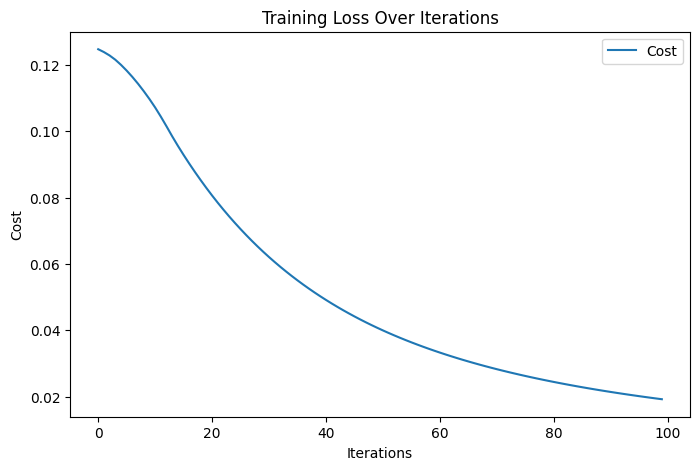

In [151]:
# Train the neural network model and retrieve the trained parameters and cost history
model, cost = neural_network(X, Y, num_iterations=100)

# Plot the cost history

plt.figure(figsize=(8, 5))
plt.plot(range(len(cost)), cost, label='Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training Loss Over Iterations')
plt.legend()
plt.show()

In [152]:
def predict(parameters, X):
    # Perform forward propagation to get the results
    results = forward_propagation(X, parameters)

    # Round the predictions to 0 or 1
    predictions = np.around(results['A2'])

    return predictions

# Make predictions using the trained model
predictions = predict(model, X)

In [153]:
# Initialize an empty list to store the indices of misclassified examples
Error = []

Error = [i for i in range(Y.shape[1]) if predictions[0,i] != Y[0,i]]

# Print the indices of misclassified examples
print("Indices of misclassified examples:", Error)

# Calculate the accuracy by subtracting the ratio of misclassified examples from 1 and multiplying by 100
accuracy = ((X.shape[0] - len(Error)) / X.shape[0]) * 100

# Print the accuracy as a percentage
print("Accuracy: {:f}%".format(accuracy))

Indices of misclassified examples: [332, 1370, 7653, 8199, 8215]
Accuracy: 99.362245%


Index 0 -> Image idx: 332
Index 1 -> Image idx: 1370
Index 2 -> Image idx: 7653
Index 3 -> Image idx: 8199
Index 4 -> Image idx: 8215


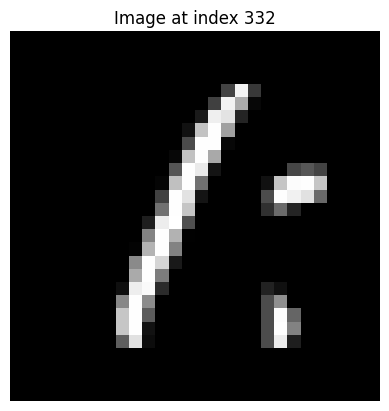

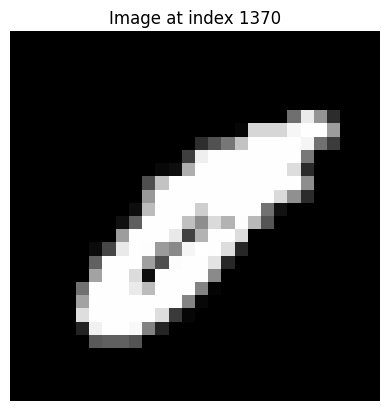

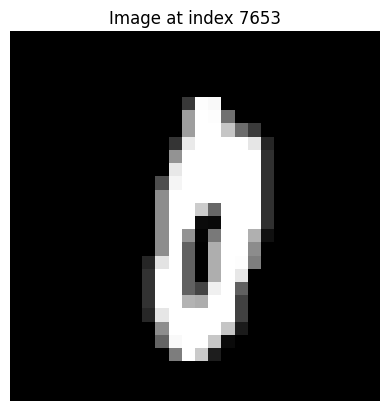

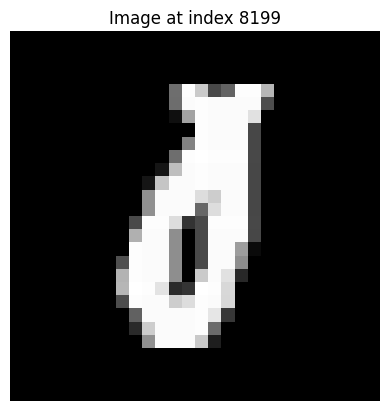

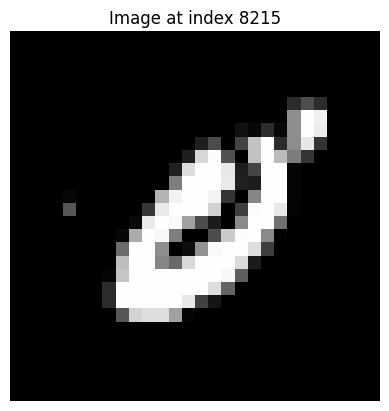

In [154]:
#Display misclassified images
for i in range(len(Error)):
    idx = int(Error[i])  # ensure idx is int
    print(f"Index {i} -> Image idx: {idx}")

    X1 = np.reshape(X[:, idx], (28, 28))

    plt.figure()  # create a new figure per image
    plt.imshow(X1, cmap='gray')
    plt.title(f"Image at index {idx}")
    plt.axis('off')

plt.show()